<h2 style="font-family:camtasia;
          font-size:320%;
          font-weight: bold;
          color: #029db9;
          text-shadow: 2px 2px 2px rgba(0, 0, 0, 0.3);
          text-align:center;
          margin: 0 auto;
          padding:10px; ">
        Trash Type Detection usnig CNN
    </h2>

<div style="max-width: 100%;">
  <img src="https://lepageandsons.com/wp-content/uploads/2021/04/Garbage-Depositphotos_180449132_xl-2015-1210x423.jpg" style="width: 100%; height: auto;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">
</div>

<a id="tc"></a>
       
<p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);
          background-size: 40% auto;
          font-family:camtasia;
          font-size:300%;
          font-weight: bold;
          color: #ffffff;
          text-align:center;
          text-shadow: 0px 0px 10px #000000;
          margin: 0 auto;
          border-radius:10px; 
          padding:15px;
          box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">
        Table of Content
    </p>

<a id="contents_tabel"></a>

<div style="border-radius: 10px; padding: 15px; background-color: #d1f9ff; font-size: 100%; text-align: left;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5); ">

* <a href="#import" style="color: #208b9f; text-decoration: none;">Step 1 | Import Libraries</a>
* <a href="#read" style="color: #208b9f; text-decoration: none;">Step 2 | Reading Files</a>
* <a href="#gen" style="color: #208b9f; text-decoration: none;">Step 3 | Generate Data</a>
* <a href="#tt" style="color: #208b9f; text-decoration: none;">Step 4 | Split Train & Test Files</a>
* <a href="#arch" style="color: #208b9f; text-decoration: none;">Step 5 | Network Architecture</a>
* <a href="#compiler" style="color: #208b9f; text-decoration: none;">Step 6 | Compiler</a>
* <a href="#train" style="color: #208b9f; text-decoration: none;">Step 7 | Train Model</a>
* <a href="#evaluate" style="color: #208b9f; text-decoration: none;">Step 8 | Model Evaluation</a>
* <a href="#use" style="color: #208b9f; text-decoration: none;">Step 9 | using Model</a>
* <a href="#coment" style="color: #208b9f; text-decoration: none;">Step 10 |  Avaliação e comentários</a>

<a id="import"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740); background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px; padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 1 | Import Libraries</p>

In [1]:
import os
import zipfile
import warnings
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.utils as utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, ZeroPadding2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras import mixed_precision
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import class_weight
from sklearn import metrics
from pathlib import Path
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.models import load_model

In [2]:
warnings.filterwarnings("ignore")

📄 [Back to Tabel of Contents](#tc)
<a id="read"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 2 | Reading Files</p>

In [6]:
zip_name = "archive.zip"
extract_to = "archive"

if os.path.exists(zip_name):
    print(f"Arquivo {zip_name} encontrado! Preparando para descompactar...")
    
    expected_path = os.path.join(extract_to, "Garbage classification", "Garbage classification")
    
    if not os.path.exists(expected_path):
        print(f"Descompactando em '{extract_to}'...")
        with zipfile.ZipFile(zip_name, 'r') as zip_ref:
            zip_ref.extractall(extract_to)
        print("Descompactação concluída!")
    else:
        print("Dataset já parece estar descompactado. Pulando etapa.")

    data_path = expected_path
    
    if os.path.exists(data_path):
        print(f"\nSucesso! Caminho definido: {data_path}")
        print("Classes encontradas:", os.listdir(data_path))
    else:
        print(f"\nATENÇÃO: A pasta {data_path} não foi criada.")
        print("Verifique se o zip tem pastas dentro de pastas. O conteúdo extraído está em:", os.listdir(extract_to))

else:
    print(f"ERRO: O arquivo '{zip_name}' não foi encontrado na pasta do notebook.")
    print("Certifique-se de que fez o upload dele para o ambiente.")

Arquivo archive.zip encontrado! Preparando para descompactar...
Descompactando em 'archive'...
Descompactação concluída!

Sucesso! Caminho definido: archive\Garbage classification\Garbage classification
Classes encontradas: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [7]:
# Data Classes
print(os.listdir(data_path))

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [8]:
main_folder_path = Path(data_path)

all_folders = [d for d in main_folder_path.glob('**/') if d.is_dir()]

# Count number of files in each class
data = [] 
for folder in all_folders:
    folder_name = folder.name
    file_count = len(list(folder.glob('*.*')))
    if folder_name != data_path: 
        data.append({'Folder Name': folder_name, 'File Count': file_count})

count = pd.DataFrame(data)

count = count.set_index('Folder Name')
count

,File Count
Folder Name,
Garbage classification,0
cardboard,403
glass,501
metal,410
paper,594
plastic,482
trash,137


In [9]:
print(f'Total {count.sum()}')
print(main_folder_path)

Total File Count    2527
dtype: int64
archive\Garbage classification\Garbage classification


In [10]:
# Show five image of each class
def plot_imgs(item_dir, top=10):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 
        plt.axis('off')
        plt.title(os.path.basename(item_dir)) 

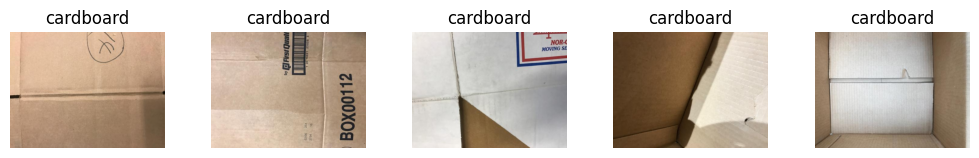

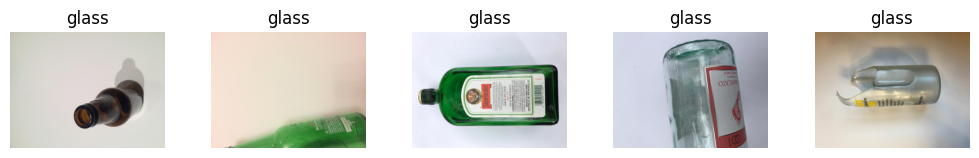

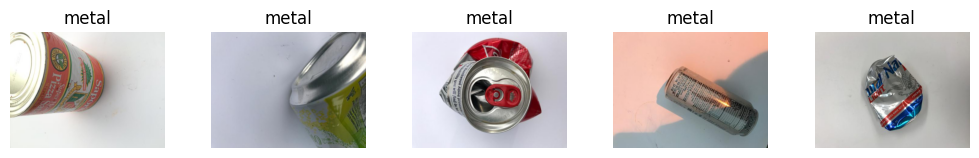

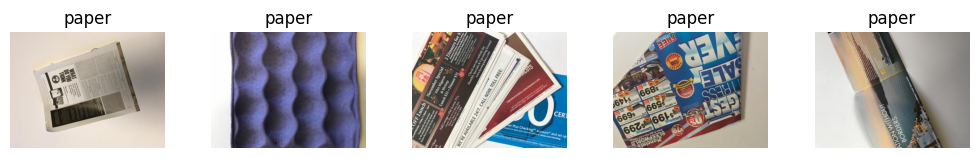

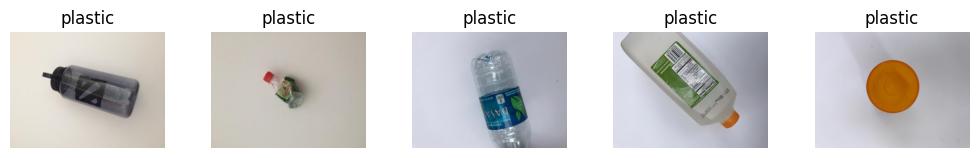

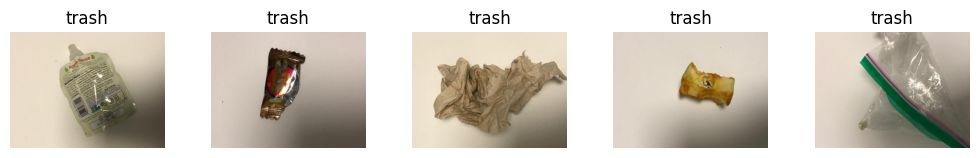

In [11]:
plot_imgs(data_path+'/cardboard')
plot_imgs(data_path+'/glass')
plot_imgs(data_path+'/metal')
plot_imgs(data_path+'/paper')
plot_imgs(data_path+'/plastic')
plot_imgs(data_path+'/trash')

📄 [Back to Tabel of Contents](#tc)
<a id="gen"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 3 | Generate Data</p>

In [12]:
# Define variable for requirements
batch_size = 32
target_size = (224, 224)
validation_split = 0.15

In [13]:
train_img_generator = ImageDataGenerator(rescale=1./255,
                                     validation_split=validation_split,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     zoom_range = 0.2,
                                     width_shift_range = 0.1,
                                     height_shift_range = 0.1,
                                     rotation_range=30,
                                     shear_range = 0.2,
                                     fill_mode='nearest'
                                    )

test_data_img_generator = ImageDataGenerator(rescale=1./255, validation_split=validation_split)

📄 [Back to Tabel of Contents](#tc)
<a id="tt"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 4 | Split Train & Test Files</p>

In [14]:
# Separate train Data
train_data = train_img_generator.flow_from_directory(data_path,
                                                        subset="training",
                                                        seed=133,
                                                        target_size=target_size,
                                                        batch_size=batch_size,
                                                        class_mode='categorical',
                                                        color_mode='rgb',
                                                       )

Found 2150 images belonging to 6 classes.


In [15]:
# Separate validation Data
test_data = test_data_img_generator.flow_from_directory(data_path,
                                                        subset="validation",
                                                        seed=133,
                                                        target_size=target_size,
                                                        batch_size=batch_size,
                                                        class_mode='categorical',
                                                        color_mode='rgb',
                                                        shuffle=False
                                                       )

Found 377 images belonging to 6 classes.


📄 [Back to Tabel of Contents](#tc)
<a id="arch"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 5 | Network Architecture</p>

In [16]:
tf.config.optimizer.set_experimental_options({'disable_meta_optimizer': True})
policy = mixed_precision.Policy('float32')
mixed_precision.set_global_policy(policy)

print(f"Política de precisão global definida para: {policy.name}")

Política de precisão global definida para: float32


In [17]:
model = Sequential()
model.add(ZeroPadding2D(padding=(1, 1), input_shape=(target_size[0], target_size[1], 3)))

# Bloco 1
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))

# Bloco 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))

# Bloco 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))

# Classificador
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [18]:
plot_model(model, show_shapes=True, show_layer_names=False)

You must install pydot (`pip install pydot`) for `plot_model` to work.


📄 [Back to Tabel of Contents](#tc)
<a id="compiler"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 6 | Compiler</p>

In [20]:
ES = EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [21]:
RLROP = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.1, min_lr=0.01)

In [22]:
MCH = ModelCheckpoint('trash.h5', monitor='val_loss', mode='min', save_best_only=True)

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()]
             )

📄 [Back to Tabel of Contents](#tc)
<a id="train"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 7 | Train Model</p>

In [24]:
training_labels = train_data.classes

unique_labels = np.unique(training_labels)

class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=unique_labels,
    y=training_labels
)

class_weights_dict = dict(zip(unique_labels, class_weights_array))

print("Mapeamento de classe:", train_data.class_indices)
print("Pesos de classe calculados:", class_weights_dict)

Mapeamento de classe: {'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}
Pesos de classe calculados: {np.int32(0): np.float64(1.0447035957240038), np.int32(1): np.float64(0.8411580594679187), np.int32(2): np.float64(1.0267430754536773), np.int32(3): np.float64(0.7095709570957096), np.int32(4): np.float64(0.8739837398373984), np.int32(5): np.float64(3.0626780626780628)}


In [27]:
history = model.fit(train_data,
                    steps_per_epoch=len(train_data),
                    epochs=100,
                    validation_data=test_data,
                    validation_steps=len(test_data),
                    callbacks=[ES, RLROP, MCH],
                    class_weight=class_weights_dict
                   )

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Epoch 1/100
68/68 [==============================] - 25s 373ms/step - loss: 1.2605 - categorical_accuracy: 0.4833 - val_loss: 1.2603 - val_categorical_accuracy: 0.5491 - lr: 0.0010
Epoch 2/100
68/68 [==============================] - 25s 370ms/step - loss: 1.1673 - categorical_accuracy: 0.5312 - val_loss: 1.3211 - val_categorical_accuracy: 0.5066 - lr: 0.0010
Epoch 3/100
68/68 [==============================] - 25s 361ms/step - loss: 1.2082 - categorical_accuracy: 0.5107 - val_loss: 1.2569 - val_categorical_accuracy: 0.5225 - lr: 0.0010
Epoch 4/100
68/68 [==============================] - 26s 376ms/step - loss: 1.1845 - categorical_accuracy: 0.5279 - val_loss: 1.1164 - val_categorical_accuracy: 0.5729 - lr: 0.0010
Epoch 5/100
68/68 [==============================] - 25s 365ms/step - loss: 1.1419 - categorical_accuracy: 0.5498 - val_lo

📄 [Back to Tabel of Contents](#tc)
<a id="evaluate"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 8 | Model Evaluation</p>

In [28]:
best_score = max(history.history['val_categorical_accuracy'] )
print(f"Best Validation score is: {best_score}")

Best Validation score is: 0.7533156275749207


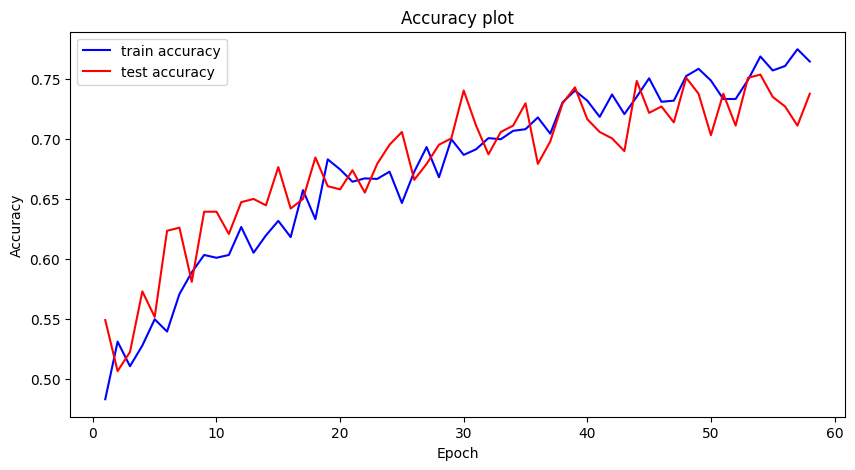

In [29]:
# Accuracy on train data :
accuracy = history.history['categorical_accuracy']

# Accuracy on test data :
val_accuracy = history.history['val_categorical_accuracy']  
epochs = range(1, len(accuracy) + 1)  # Epochs

# Accuracy line plot :
plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy, 'b', label='train accuracy')
plt.plot(epochs, val_accuracy, 'r', label='test accuracy')
plt.title('Accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend();

📄 [Back to Tabel of Contents](#tc)
<a id="use"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 9 |  Using Model</p>

In [25]:
classes = train_data.class_indices
classes

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

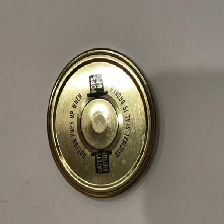

In [28]:
img = utils.load_img(
    main_folder_path / 'metal' / 'metal24.jpg',
    #grayscale=False,
    color_mode='rgb',
    target_size=(224, 224),
    interpolation='nearest',
    keep_aspect_ratio=False
)

img 

In [29]:
img = utils.img_to_array(img)
img = img / 255.0    # Normalize the image

result = model.predict(tf.expand_dims(img, axis=0))

classes = train_data.class_indices

for key, value in classes.items():
    if value == np.argmax(result):
        print(key)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
cardboard


<a id="contents_tabel"></a>

<div style="border-radius: 10px; padding: 15px; background-color: #d1f9ff; font-size: 100%; text-align: left;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5); ">

You are welcome to try out the application built on this model :<br>    
    https://github.com/F-Mirfeizi/Trash-Detector

📄 [Back to Tabel of Contents](#tc)
<a id="coment"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 10 |  Avaliação e comentários</p>

Nesta seção, avaliamos o desempenho final do nosso modelo e comentamos as principais conclusões do projeto.

In [ ]:
# Celula para carregar um modelo gravado caso necessário
model = load_model('trash.h5')

In [44]:
# Gera predições no conjunto de teste, calcula a acurácia final e a matriz de confusão.
true_classes = test_data.classes
predictions_prob = model.predict(test_data, steps=len(test_data))
predictions_classes = np.argmax(predictions_prob, axis=1)
final_accuracy = accuracy_score(true_classes, predictions_classes)
print(f"Acurácia de teste final: {final_accuracy*100:2f}%")
matriz = confusion_matrix(true_classes, predictions_classes)

12/12 [==============================] - 1s 80ms/step
Acurácia de teste final: 75.066313%


Como podemos ver, foi possível treinar um modelo que tem um aproveitamento de 75%, conforme comentado na [página do conjunto de dados](https://github.com/garythung/trashnet). Além disso, esse modelo teve a val_loss de 0.7401, o menor valor que conseguimos durante o treinamento.

## Análise da matriz de confusão

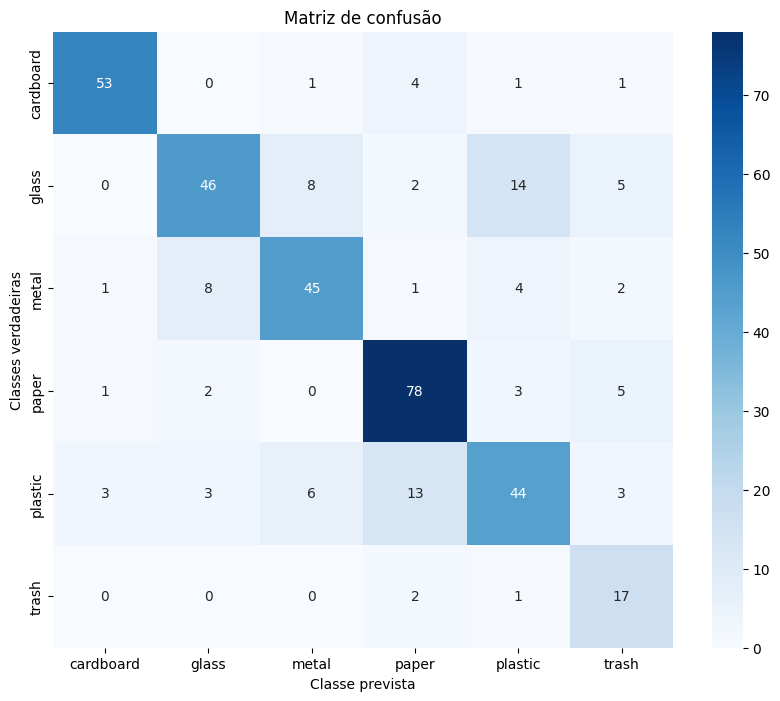

In [45]:
class_labels = list(test_data.class_indices.keys())
plt.figure(figsize = (10, 8))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

plt.title("Matriz de confusão")
plt.ylabel("Classes verdadeiras")
plt.xlabel("Classe prevista")
plt.savefig("matriz_confusao.png")
plt.show()

A matriz de confusão nos permite visualizar exatamente quais classes o modelo confunde mais. A diagonal principal representa os acertos e todos os outros valores são erros.

Analisando a matriz, notamos que:

- No geral, o modelo tende a usar os padrões para fazer classificações erradas de exemplos de outras classes na seguinte ordem: $plastic(23) > paper(21) > trash(16) > metal(15) > glass(13) > cardboard(5)$
- As classes foram classificadas de forma errada pelo modelo na seguinte ordem: $glass(29) > plastic(28) > metal(16) > paper(11) > cardboard(7) > trash(3)$
- O modelo teve dificuldade em aprender a classificar corretamente **plastic** e **glass**, sendo essas classes juntas portando 59% (57 em números absolutos) do total de erros de classificação presentes na matriz.
- A matriz também indica que o modelo confunde **glass** com **plastic** (classificando 14 exemplos de glass como plastic) e **plastic** com **paper** (classificando 13 exemplos de plastic como paper), evidenciando a dificuldade do modelo de distinguir materiais com características similares, ou até mesmo materiais compostos, como *uma garrafa com um rótulo de papel*.
- Outro aspecto notável é que o modelo aprendeu a classificar corretamente a classe **trash**, apesar dela ter menos exemplos que as outras classes, o que evidencia os efeitos do uso da class_weight.
- A melhor classe que o modelo aprendeu a classificar é a **cardboard** tendo apenas 7 exemplos classificados errados e classificando exemplos de outras classes como cardboard apenas 5 vezes. Proporcionalmente, podemos dizer que esse modelo conseguiu generalizar bem essa classe e não confundir ela com as outras.

## Conclusão sobre o impacto do data augmentation

O Data Augmentation foi uma técnica essencial para este projeto.

O dataset TrashNet é muito pequeno, com apenas 2.527 imagens no total, e sem o data augmentation, um modelo de CNN profundo como o que foi usado memorizaria rapidamente as imagens de treino, causando um overfitting, e falharia em generalizar para imagens novas, resultando em uma **val_loss** alta e uma **val_accuracy** muito baixa.

Ao aplicar transformações aleatórias (como rotação, zoom, inversão horizontal e vertical), foi criado "novas" versões sintéticas das imagens de treino em cada época. Isso forçou o modelo a aprender as características inerentes de cada classe, por exemplo, ***o que realmente faz um plástico parecer um plástico, não importando o ângulo ou o zoom?***.

O data augmentation foi importante para permitir que o modelo aprendesse a aprender características gerais dos objetos, ou seja, uma **melhor capacidade de generalização** para dados nunca vistos, o que permitiu ao modelo alcançar uma acurácia de teste de 75.06%, um resultado razoável que seria muito improvável sem o uso dessa técnica